# Enron Dataset

##  Data Cleaning

####  Load dataset

In [1]:
import sys
import pickle
import pandas as pd
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
    df = pd.DataFrame(data_dict).T

/Users/watseob/anaconda/envs/gl-env/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


####  Peek into Dataset

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
bonus                        146 non-null object
deferral_payments            146 non-null object
deferred_income              146 non-null object
director_fees                146 non-null object
email_address                146 non-null object
exercised_stock_options      146 non-null object
expenses                     146 non-null object
from_messages                146 non-null object
from_poi_to_this_person      146 non-null object
from_this_person_to_poi      146 non-null object
loan_advances                146 non-null object
long_term_incentive          146 non-null object
other                        146 non-null object
poi                          146 non-null object
restricted_stock             146 non-null object
restricted_stock_deferred    146 non-null object
salary                       146 non-null object
shared_receipt_with_poi      146 non-null objec

In [3]:
df.shape

(146, 21)

In [4]:
df.columns

Index([u'bonus', u'deferral_payments', u'deferred_income', u'director_fees',
       u'email_address', u'exercised_stock_options', u'expenses',
       u'from_messages', u'from_poi_to_this_person',
       u'from_this_person_to_poi', u'loan_advances', u'long_term_incentive',
       u'other', u'poi', u'restricted_stock', u'restricted_stock_deferred',
       u'salary', u'shared_receipt_with_poi', u'to_messages',
       u'total_payments', u'total_stock_value'],
      dtype='object')

In [5]:
df.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014


####  Number of POI ,  Non-POI

In [6]:
from collections import Counter

Counter(df.poi)

Counter({False: 128, True: 18})

#### Missing values

In [7]:
import numpy as np
df = df.replace('NaN', np.nan)
df.isnull().sum()

bonus                         64
deferral_payments            107
deferred_income               97
director_fees                129
email_address                 35
exercised_stock_options       44
expenses                      51
from_messages                 60
from_poi_to_this_person       60
from_this_person_to_poi       60
loan_advances                142
long_term_incentive           80
other                         53
poi                            0
restricted_stock              36
restricted_stock_deferred    128
salary                        51
shared_receipt_with_poi       60
to_messages                   60
total_payments                21
total_stock_value             20
dtype: int64

*** There are too much missing values in restricted_stock_deferred, director_fees,deferral_payments, loan_advances. ***
##  Select Features

First, I removed features which have a lot of missing values.

In [8]:
### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".

features_list = ['poi','salary', 'bonus', 'total_payments', 'long_term_incentive', 'deferred_income',
                      'total_stock_value', 'restricted_stock', 'exercised_stock_options', 'expenses', 'other',
                'to_messages', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi']

enron = df[features_list].copy()

##  Remove outliers

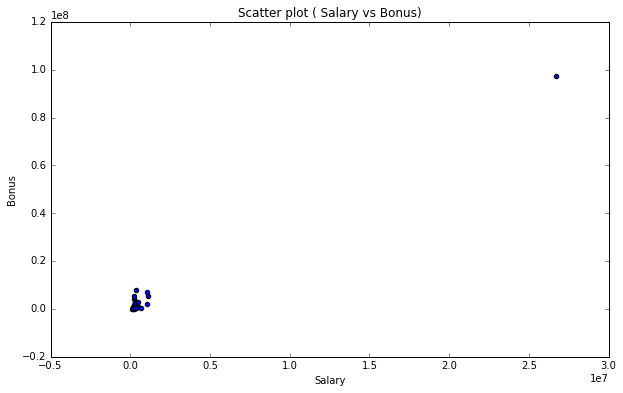

In [9]:
### Task 2: Remove outliers
import matplotlib.pyplot as plt
%matplotlib inline 
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(enron.salary, enron.bonus)
plt.xlabel('Salary')
plt.ylabel('Bonus')
plt.title('Scatter plot ( Salary vs Bonus)')
plt.show()

As we can see a scatter plot there is on huge outlier.   
Let's check what it is.

In [10]:
enron.salary.argmax()

'TOTAL'

In [11]:
enron = enron.drop('TOTAL')

Drop 'TOTAL' and then draw scatter plot again

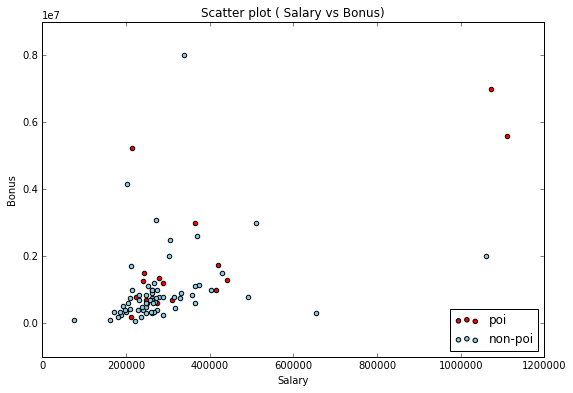

In [12]:
fig, ax = plt.subplots(figsize=(9,6))
plt.scatter(enron.salary[enron.poi==1], enron.bonus[enron.poi==1],c='red',label='poi')
plt.scatter(enron.salary[enron.poi==0], enron.bonus[enron.poi==0],c='skyblue',label='non-poi')
plt.xlabel('Salary')
plt.ylabel('Bonus')
plt.title('Scatter plot ( Salary vs Bonus)')
plt.legend(loc='lower right')
plt.show()

##  Create New Features

I made new features fraction of message from poi and fraction of message to poi.  
Let's check new featrues by drawing scatter plot.

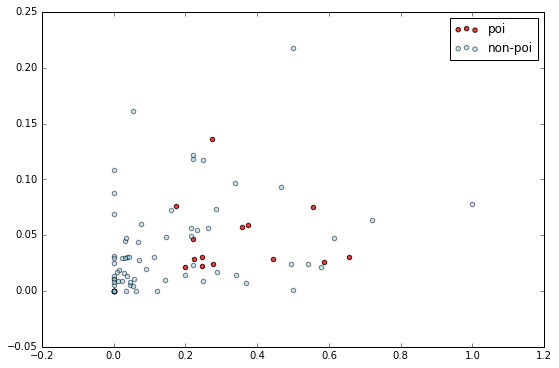

In [13]:
enron['fraction_from_poi'] = enron.from_poi_to_this_person / enron.to_messages
enron['fraction_to_poi'] = enron.from_this_person_to_poi / enron.from_messages
fig, ax = plt.subplots(figsize=(9,6))
plt.scatter(enron.fraction_to_poi[enron.poi == 1], enron.fraction_from_poi[enron.poi == 1],c='red',alpha=0.8,label='poi')
plt.scatter(enron.fraction_to_poi[enron.poi == 0], enron.fraction_from_poi[enron.poi == 0],c='skyblue', alpha=0.5, label='non-poi')
plt.legend(loc='upper right')


There is no distinct pattern, but their fraction are higher than ohters.   
*** before extracting features, let's clean some features. ***

In [14]:
for name in data_dict:
    
    data_point = data_dict[name]

    from_poi_to_this_person = data_point["from_poi_to_this_person"]
    to_messages = data_point["to_messages"]
    
    from_this_person_to_poi = data_point["from_this_person_to_poi"]
    from_messages = data_point["from_messages"]
   
    if from_poi_to_this_person == 'NaN' or to_messages == 'NaN' :
        data_point["fraction_from_poi"] = "NaN"
    else :
        fraction_from_poi = float(from_poi_to_this_person) / float(to_messages)
        data_point["fraction_from_poi"] = fraction_from_poi
    
    if from_this_person_to_poi == 'NaN' or from_messages == 'NaN' :
        data_point['fraction_to_poi'] = "NaN"
    else :
        fraction_to_poi = float(from_this_person_to_poi) / float(from_messages)
        data_point["fraction_to_poi"] = fraction_to_poi
data_dict.pop('TOTAL')

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'fraction_from_poi': 'NaN',
 'fraction_to_poi': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

Now, let's extract features.  
***  Add new features and remove features which were reduntant features. ***

In [15]:
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.

from sklearn.cross_validation import train_test_split

my_dataset = data_dict

features_list += ['fraction_from_poi','fraction_to_poi']
remove_list = ['to_messages','from_messages','from_poi_to_this_person','from_this_person_to_poi']

for x in remove_list :
    features_list.remove(x)

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

*** Now, Let's split dataset to train and test ***

In [16]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

####  Check feature importances

In [17]:
features_name = features_list[1:]
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs = -1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

print "Accuracy:", forest.score(X_test,y_test)
print "Features Importances"
for f in range(len(indices)) :
    print "%2d) %-*s %f" %(f+1, 30, features_name[indices[f]], importances[indices[f]] )

Accuracy: 0.909090909091
Features Importances
 1) bonus                          0.139120
 2) fraction_to_poi                0.127026
 3) expenses                       0.095522
 4) exercised_stock_options        0.082826
 5) restricted_stock               0.079379
 6) total_payments                 0.076054
 7) other                          0.075824
 8) total_stock_value              0.069795
 9) salary                         0.069440
10) deferred_income                0.068901
11) long_term_incentive            0.066652
12) fraction_from_poi              0.049460


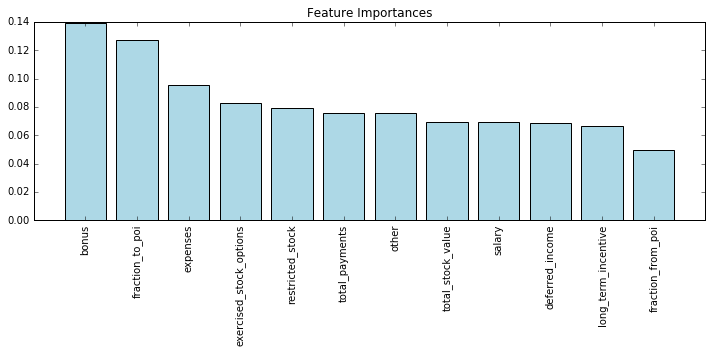

In [18]:
features_name = np.array(features_name)
fig, ax = plt.subplots(figsize=(10,5))
plt.title('Feature Importances')
plt.bar(range(len(X_train[0])), importances[indices], color = 'lightblue', align='center')
plt.xticks(range(len(features_name)),features_name[indices],rotation = 90)
plt.xlim([-1,len(X_train[0])])
plt.tight_layout()
plt.show()

## Varity of classifiers

In [33]:
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import cross_val_score
clf_list = ['GaussianNB','LogisticRegression','SVM','KNN','AdaBoost']
tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=0)

clf1 = GaussianNB()
clf2 = LogisticRegression(penalty='l2', C=0.001)
clf3 = SVC(kernel='rbf',C=10000)
clf4 = KNeighborsClassifier(n_neighbors=3)
clf5 = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=1000,
                         learning_rate=0.01,
                         random_state=0)
pipe2 = Pipeline([['sc',StandardScaler()],
                  ['clf',clf2]])

pipe3 = Pipeline([['sc',StandardScaler()],
                  ['clf',clf5]])


for clf, label in zip([clf1,pipe2,clf3,clf4,clf5],clf_list) :
    clf.fit(X_train,y_train)
    scores = classification_report(clf.predict(X_test),y_test)
    print '--------------------------'*2
    print label,'\n',scores
    print "Accuracy :",clf.score(X_test,y_test)
   



----------------------------------------------------
GaussianNB 
             precision    recall  f1-score   support

        0.0       0.92      0.92      0.92        39
        1.0       0.40      0.40      0.40         5

avg / total       0.86      0.86      0.86        44

Accuracy : 0.863636363636
----------------------------------------------------
LogisticRegression 
             precision    recall  f1-score   support

        0.0       0.92      0.95      0.94        38
        1.0       0.60      0.50      0.55         6

avg / total       0.88      0.89      0.88        44

Accuracy : 0.886363636364
----------------------------------------------------
SVM 
             precision    recall  f1-score   support

        0.0       1.00      0.89      0.94        44
        1.0       0.00      0.00      0.00         0

avg / total       1.00      0.89      0.94        44

Accuracy : 0.886363636364
----------------------------------------------------
KNN 
             precision 

##  Parameter Tuning

In [20]:
### Task 5: Tune your classifier to achieve better than .3 precision and recall
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info:
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!

from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.learning_curve import learning_curve
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import recall_score, f1_score
cv = StratifiedShuffleSplit(labels, 100, random_state = 42)

param_range=[0.000001,0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0]

param_grid=[{'clf__C':param_range}]

gs_Logistic = GridSearchCV(estimator=pipe2,
                   param_grid=param_grid,
                   scoring='accuracy',
                   cv=cv,
                   n_jobs=-1)

gs_Logistic = gs_Logistic.fit(features, labels)
pred = gs_Logistic.predict(features)
print classification_report(pred, labels)
print(gs_Logistic.best_score_)
print gs_Logistic.best_estimator_

/Users/watseob/anaconda/envs/gl-env/lib/python2.7/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)
/Users/watseob/anaconda/envs/gl-env/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


             precision    recall  f1-score   support

        0.0       0.98      0.90      0.94       136
        1.0       0.28      0.62      0.38         8

avg / total       0.94      0.89      0.91       144

0.861333333333
Pipeline(steps=[['sc', StandardScaler(copy=True, with_mean=True, with_std=True)], ['clf', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)]])


In [34]:

pipe_svc = Pipeline([('scl', StandardScaler()),
                     ('clf', SVC(random_state=1))])
param_range=[ 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
g_range=[]
param_grid=[{'clf__C':param_range,
             'clf__kernel':['linear']},
            {'clf__C':param_range,
             'clf__gamma':param_range,
             'clf__kernel':['rbf']}]

gs_SVM = GridSearchCV(estimator=pipe_svc,
                 param_grid=param_grid,
                 scoring='accuracy',
                 cv=cv,
                 n_jobs=-1)

gs_SVM.fit(features, labels)
pred = gs_SVM.predict(features)

print classification_report(pred, labels)
print gs_SVM.best_score_
print gs_SVM.best_estimator_
print gs_SVM.score(X_test,y_test)

             precision    recall  f1-score   support

        0.0       1.00      0.91      0.95       139
        1.0       0.28      1.00      0.43         5

avg / total       0.97      0.91      0.93       144

0.880666666667
Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False))])
0.931818181818


/Users/watseob/anaconda/envs/gl-env/lib/python2.7/site-packages/sklearn/grid_search.py:438: ChangedBehaviorWarning: The long-standing behavior to use the estimator's score function in GridSearchCV.score has changed. The scoring parameter is now used.
  ChangedBehaviorWarning)


In [22]:
pipe_knn = Pipeline([('scl', StandardScaler()),
                     ('clf', KNeighborsClassifier())])

param_range=[1,3,5,7]

param_grid=[{'clf__n_neighbors':param_range}]

gs_KNN = GridSearchCV(estimator=pipe_knn,
                      param_grid=param_grid,
                      scoring='accuracy',
                      cv=cv,
                      n_jobs=-1)
gs_KNN.fit(features, labels)
pred = gs_KNN.predict(features)

print classification_report(pred,labels)
print gs_KNN.best_score_
print gs_KNN.best_estimator_

             precision    recall  f1-score   support

        0.0       0.98      0.89      0.93       140
        1.0       0.11      0.50      0.18         4

avg / total       0.96      0.88      0.91       144

0.87
Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))])


In [23]:
### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)